In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [74]:
df = pd.read_csv("prediction_churndata.csv")
df.head(3)

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices


In [75]:
# Drop columns that won't be used for prediction

data = df.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

In [76]:
data.head(5)

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,Male,35,No,Delhi,7,27,NaN,Yes,No,Yes,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,Yes,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,Yes,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,Yes,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,Yes,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


In [77]:
# List of columns to be label encoded

columns_to_encode = [

    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',

    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',

    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',

    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',

    'Payment_Method'

]

In [78]:
# Encode categorical variables except the target variable

label_encoders = {}

for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()

    data[column] = label_encoders[column].fit_transform(data[column])

 

In [79]:
# Split data into features and target

X = data.drop('Customer_Status', axis=1)

y = data['Customer_Status']

In [80]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Initialize the Random Forest Classifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [82]:
# Train the model

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [83]:
# Make predictions

y_pred = rf_model.predict(X_test)

In [84]:
# Evaluate the model

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")

print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 34  25]
 [  6 135]]

Classification Report:
              precision    recall  f1-score   support

     Churned       0.85      0.58      0.69        59
      Stayed       0.84      0.96      0.90       141

    accuracy                           0.84       200
   macro avg       0.85      0.77      0.79       200
weighted avg       0.85      0.84      0.84       200



In [85]:
# Assuming `rf_model` is your trained RandomForestClassifier
importances = rf_model.feature_importances_

# Sort the indices of the feature importances in descending order
indices = np.argsort(importances)[::-1]


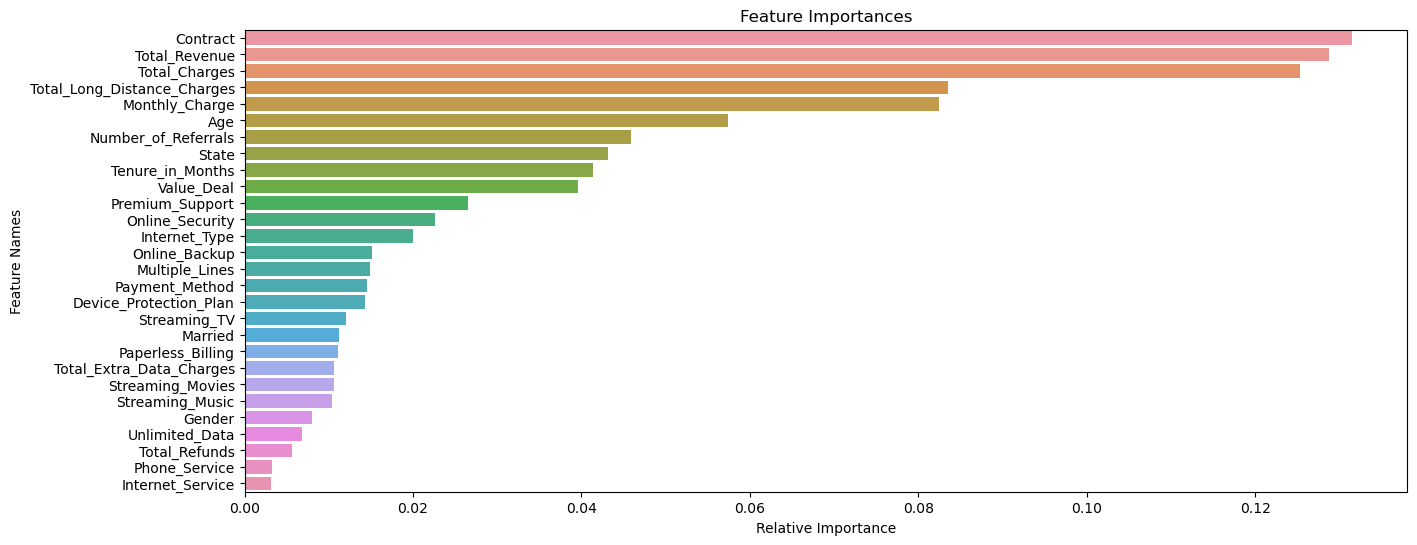

In [86]:
# Plot the feature importances

plt.figure(figsize=(15, 6))

sns.barplot(x=importances[indices], y=X.columns[indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()

# Use Model for Prediction on New Data



In [88]:
new_data = pd.read_csv("prediction_churndatajoin.csv")
new_data.head(3)

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,93520-GUJ,Female,67,No,Gujarat,13,19,Deal 5,Yes,Yes,...,Bank Withdrawal,72.10,72.1,0.0,0,7.77,79.87,Joined,NaN,NaN
1,57256-BIH,Female,18,No,Bihar,9,7,NaN,Yes,No,...,Credit Card,19.85,57.2,0.0,0,9.36,66.56,Joined,NaN,NaN
2,72357-MAD,Female,53,No,Madhya Pradesh,14,12,Deal 5,Yes,No,...,Credit Card,44.30,44.3,0.0,0,42.95,87.25,Joined,NaN,NaN


In [89]:
# Retain the original DataFrame to preserve unencoded columns

original_data = new_data.copy()

In [90]:
# Retain the Customer_ID column

customer_ids = new_data['Customer_ID']

In [91]:
# Drop columns that won't be used for prediction in the encoded DataFrame

new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

In [92]:
# Encode categorical variables using the saved label encoders

for column in new_data.select_dtypes(include=['object']).columns:

    new_data[column] = label_encoders[column].transform(new_data[column])

In [93]:
# Make predictions

new_predictions = rf_model.predict(new_data)

In [94]:
# Add predictions to the original DataFrame

original_data['Customer_Status_Predicted'] = new_predictions

In [95]:
# Filter the DataFrame to include only records predicted as "Churned"

original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

In [98]:
# Save the results

original_data.to_csv(("prediction_churndatajoin.csv"), index=False)